In [1]:
%load_ext autoreload
%autoreload 2

In [163]:
import sys
sys.path.append('../')
# import new xarray data structure
from rhkpy import rhkpy
import pylab as pl
import numpy as np
import xarray as xr

# map

In [264]:
filename_map = 'hopg_300k_2020_08_11_16_04_06_999.sm4'
mapspec = rhkpy.stmdata(filename_map)

In [166]:
mapspec.spectra.attrs

{'filename': 'hopg_300k_2020_08_11_16_04_06_999.sm4',
 'bias': 0.39999998,
 'bias units': 'V',
 'setpoint': 499.99998585903427,
 'setpoint units': 'pA',
 'measurement date': '08/11/20',
 'measurement time': '15:49:04'}

# Reorganize $dI/dV$ line spectra

In [213]:
filename_line = 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4'
linespec = rhkpy.stmdata(filename_line, datatype = 'line')

In [214]:
linespec.spectra.attrs

{'filename': 'line_9K_ABC6_2020_11_01_12_12_27_213.sm4',
 'bias': 0.49999988,
 'bias units': 'V',
 'setpoint': 99.99999439624929,
 'setpoint units': 'pA',
 'measurement date': '11/01/20',
 'measurement time': '11:32:09'}

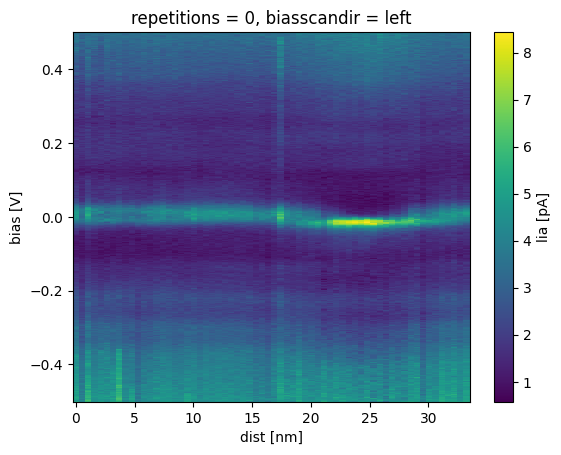

In [191]:
linespec.spectra.isel(biasscandir = 0, repetitions = 0)['lia'].plot()

In [220]:
filename_singlespec = 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4'
spec = rhkpy.stmdata(filename_singlespec)

spec
iv


In [221]:
spec.spectra.attrs

{'filename': 'dI-dV_Stripes-9K-HOPG-SPI2-3_2021_09_07_10_23_58_152.sm4',
 'speccoord_x': -97.14440096786348,
 'speccoord_y': -73.07891536356692,
 'speccoord_x units': 'nm',
 'speccoord_y units': 'nm',
 'bias': 0.59999996,
 'bias units': 'V',
 'setpoint': 39.999996370720936,
 'setpoint units': 'pA',
 'measurement date': '09/07/21',
 'measurement time': '10:19:42'}

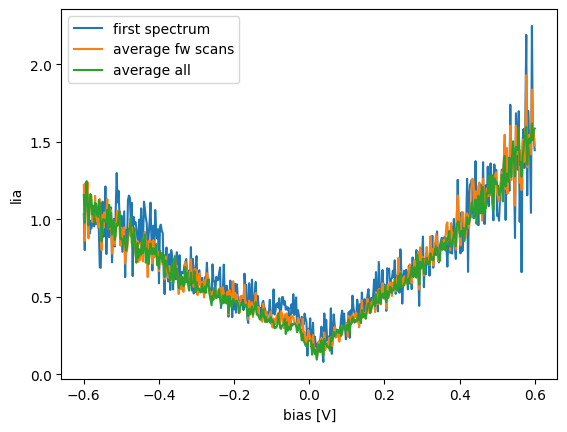

In [233]:
spec.spectra.isel(repetitions = 0, biasscandir = 0)['lia'].plot(label = 'first spectrum')
spec.spectra.isel(biasscandir = 0).mean(dim='repetitions')['lia'].plot(label = 'average fw scans')
spec.spectra.mean(dim=['repetitions', 'biasscandir'])['lia'].plot(label = 'average all')
pl.legend()

# processing topographic data

In [286]:
from spym.process.level import align
from spym.process.level import plane

In [368]:
filename_map = 'C:/Users/zrbyt/OneDrive - energia.mta.hu/Documents/work_MFA/cikkek - published/2022/RG magnetism/figures/splitting/9K_ABC6_2020_11_02_08_47_19_209.sm4'
mapspec = rhkpy.stmdata(filename_map)

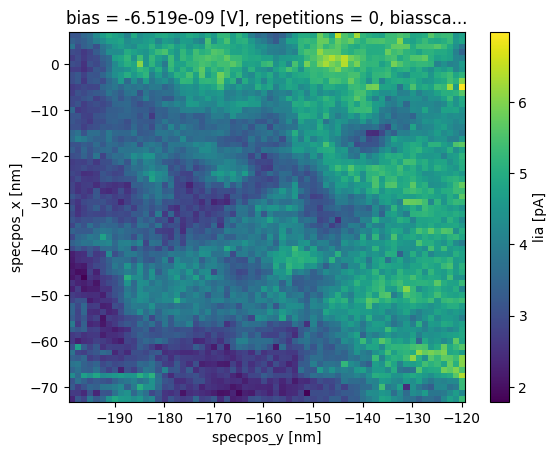

In [292]:
mapspec.spectra.isel(biasscandir = 0, repetitions = 0).sel(bias = 0, method='nearest')['lia'].plot()

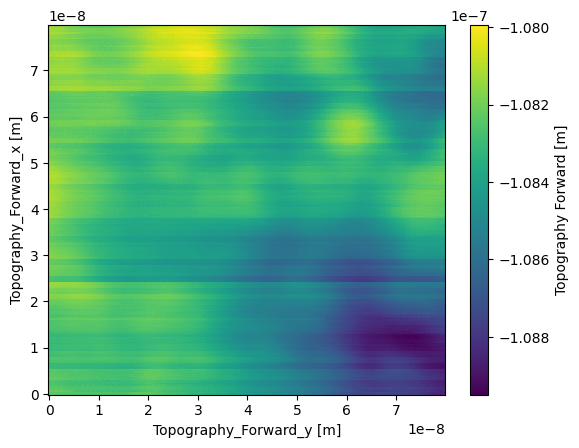

In [293]:
topo = mapspec.spymdata.Topography_Forward
topo.plot()

In [294]:
topoaligned, bg = align(topo, baseline='median')
topoaligned, bg = plane(topoaligned)

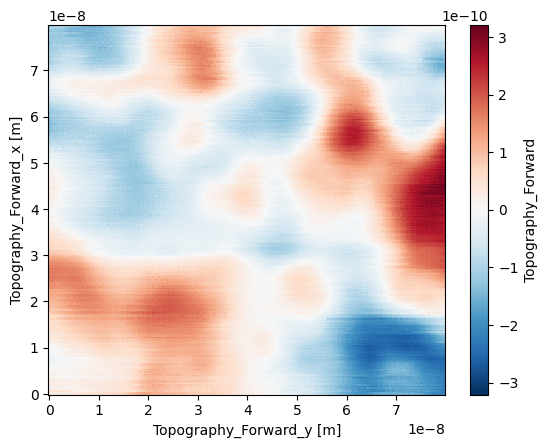

In [295]:
topoaligned.plot()

In [296]:
mapspec.spymdata.Topography_Forward.attrs['RHK_Xoffset']

-3.2911743e-08

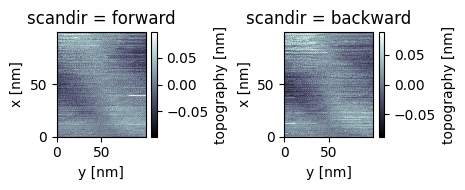

In [362]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (4.7, 2))
topo.image.isel(scandir = 0)['topography'].plot(cmap = 'bone', ax = ax1)
topo.image.isel(scandir = 1)['topography'].plot(cmap = 'bone', ax = ax2)
pl.tight_layout()

In [363]:
topo.image.attrs

{'filename': 'hopg_300k_2020_08_11_16_04_06_999.sm4',
 'xoffset': 0.0,
 'yoffset': 0.0,
 'xoffset_units': 'nm',
 'yoffset_units': 'nm',
 'bias': 0.39999998,
 'bias units': 'V',
 'setpoint': 499.99998585903427,
 'setpoint units': 'pA',
 'measurement date': '08/11/20',
 'measurement time': '15:47:43'}

# Mapping the spectrum coordinates to the topography image

In [467]:
mapspec = rhkpy.stmdata(filename_map)

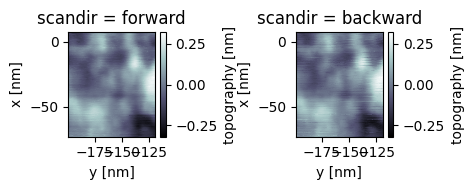

In [468]:
fig, (ax1, ax2) = pl.subplots(1, 2, figsize = (4.7, 2))
mapspec.image.isel(scandir = 0)['topography'].plot(cmap = 'bone', ax = ax1)
mapspec.image.isel(scandir = 1)['topography'].plot(cmap = 'bone', ax = ax2)
pl.tight_layout()

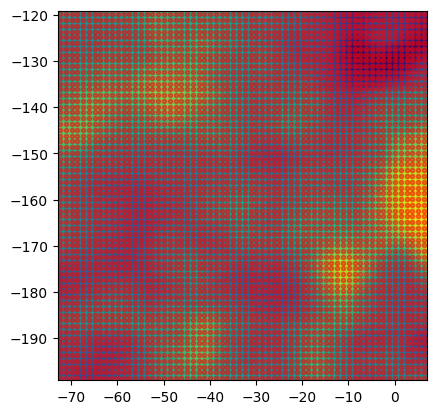

In [469]:
xx = mapspec.image.coords['x'].data
yy = mapspec.image.coords['y'].data
dx = (xx[1] - xx[0])/2.
dy = (yy[1] - yy[0])/2.
ext = [xx[0] - dx, xx[-1] + dx, yy[0] - dy, yy[-1] + dy]
pl.imshow(mapspec.image.isel(scandir = 0)['topography'].data,
         extent = ext)
pl.scatter(mapspec.spectra['x'].data, mapspec.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

In [478]:
mapspec.spymdata.Topography_Forward.attrs['RHK_Angle']

0.0

## trying line spectra

In [466]:
linespec = rhkpy.stmdata(filename_line)

In [477]:
linespec.spymdata.Topography_Forward.attrs['RHK_Angle']

168.75032

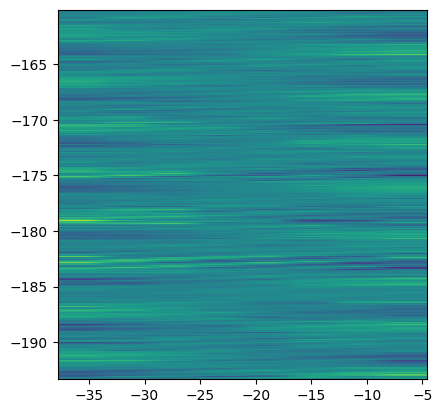

In [475]:
xx = linespec.image.coords['x'].data
yy = linespec.image.coords['y'].data
dx = (xx[1] - xx[0])/2.
dy = (yy[1] - yy[0])/2.
ext = [xx[0] - dx, xx[-1] + dx, yy[0] - dy, yy[-1] + dy]

pl.imshow(linespec.image.isel(scandir = 0)['topography'].data, extent = ext)

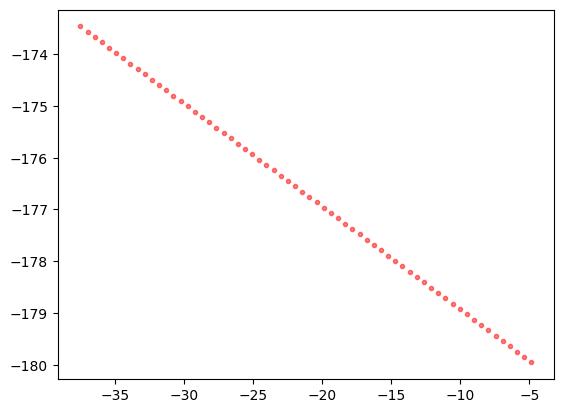

In [472]:
pl.scatter(linespec.spectra['x'].data, linespec.spectra['y'].data, marker = '.', alpha = 0.5, color = 'r')

# Implementing $I(z)$ spectra

In [484]:
filename_izmap = 'Iz_map_Stripes-9K-HOPG-SPI2-3_2021_09_08_11_21_03_743.sm4'
izmap = rhkpy.stmdata(filename_izmap)

In [485]:
print(izmap.datatype, izmap.spectype)

map iz
